### Importing packages

In [41]:
import os
import pandas as pd
import matplotlib.pyplot as plt

import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout

import squarify

### Examining files

In [2]:
path = '../shared/C_amc_141/R_amc_3.1_12921/'

files = []
for r, d, f in os.walk(path):
    for file in f:
        files.append(os.path.join(r, file))

In [3]:
print(len(files))
for f in files[0:10]:
    print(f)

175600
../shared/C_amc_141/R_amc_3.1_12921/203_vert_spacy_rftt/artikel_/APA/1986/APA_19860220.xml
../shared/C_amc_141/R_amc_3.1_12921/203_vert_spacy_rftt/artikel_/APA/1986/APA_19860102.xml
../shared/C_amc_141/R_amc_3.1_12921/203_vert_spacy_rftt/artikel_/APA/1986/APA_19860222.xml
../shared/C_amc_141/R_amc_3.1_12921/203_vert_spacy_rftt/artikel_/APA/1986/APA_19860103.xml
../shared/C_amc_141/R_amc_3.1_12921/203_vert_spacy_rftt/artikel_/APA/1986/APA_19860221.xml
../shared/C_amc_141/R_amc_3.1_12921/203_vert_spacy_rftt/artikel_/APA/1986/APA_19860104.xml
../shared/C_amc_141/R_amc_3.1_12921/203_vert_spacy_rftt/artikel_/APA/1986/APA_19860223.xml
../shared/C_amc_141/R_amc_3.1_12921/203_vert_spacy_rftt/artikel_/APA/1986/APA_19860105.xml
../shared/C_amc_141/R_amc_3.1_12921/203_vert_spacy_rftt/artikel_/APA/1986/APA_19860224.xml
../shared/C_amc_141/R_amc_3.1_12921/203_vert_spacy_rftt/artikel_/APA/1986/APA_19860106.xml


[using a pre-generated folderstats csv](https://janakiev.com/blog/python-filesystem-analysis/)

In [92]:
df_files = pd.read_csv('./files_corpus_3.1.csv')
df_files = df_files[df_files['folder'] == False]
df_files.drop(['id', 'num_files'], axis=1, inplace=True)
df_files['path'] = df_files['path'].str.replace('./shared/C_amc_141/R_amc_3.1_12921/203_vert_spacy_rftt/', '')
df_files['main'] = df_files['path'].str.extract(r'([A-Za-z-_]+)(\/)', expand=False)[0]
df_files['source'] = df_files['path'].str.extract(r'([A-Za-z-_]+)\/([A-Za-z-_]+)(\/)', expand=False)[1]
df_files['year'] = df_files['path'].str.extract(r'([A-Za-z-_]+)\/([A-Za-z-_]+)\/([0-9]{4})', expand=False)[2]
df_files['date'] = pd.to_datetime(df_files['name'].str.extract(r'([A-Za-z_]+)([0-9]{8})', 
                                                               expand=False)[1], format='%Y%m%d', errors='coerce')
df_files[['date', 'main', 'source', 'year', 'name', 'size', 'path',]].head()

,date,main,source,year,name,size,path
0,1986-02-20,artikel_,APA,1986,APA_19860220,6142251,artikel_/APA/1986/APA_19860220.xml
1,1986-01-02,artikel_,APA,1986,APA_19860102,3397140,artikel_/APA/1986/APA_19860102.xml
2,1986-02-22,artikel_,APA,1986,APA_19860222,3352934,artikel_/APA/1986/APA_19860222.xml
3,1986-01-03,artikel_,APA,1986,APA_19860103,3794819,artikel_/APA/1986/APA_19860103.xml
4,1986-02-21,artikel_,APA,1986,APA_19860221,5763730,artikel_/APA/1986/APA_19860221.xml


In [93]:
df_files.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175600 entries, 0 to 176739
Data columns (total 14 columns):
path         175600 non-null object
name         175600 non-null object
extension    175600 non-null object
size         175600 non-null int64
atime        175600 non-null object
mtime        175600 non-null object
ctime        175600 non-null object
folder       175600 non-null bool
depth        175600 non-null int64
parent       175600 non-null int64
main         175600 non-null object
source       171457 non-null object
year         171457 non-null object
date         175600 non-null datetime64[ns]
dtypes: bool(1), datetime64[ns](1), int64(3), object(9)
memory usage: 18.9+ MB


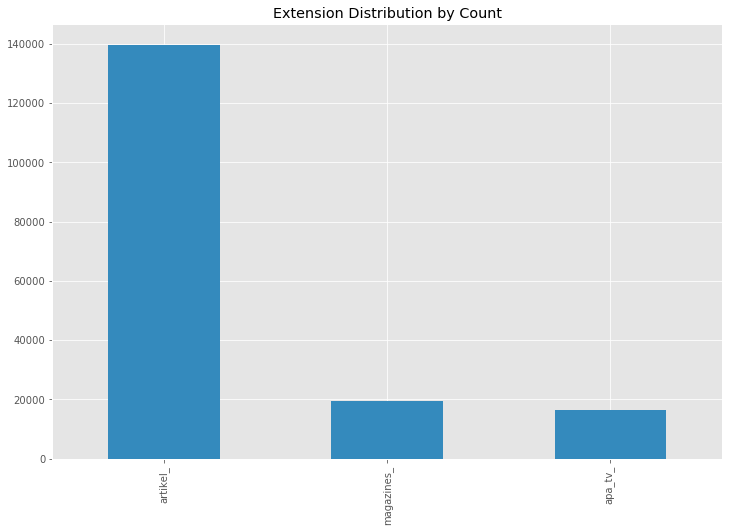

In [96]:
with plt.style.context('ggplot'):
    df_files['main'].value_counts().plot(kind='bar',
                                         figsize=(12,8),
                                         color='C1', 
                                         title='Extension Distribution by Count');

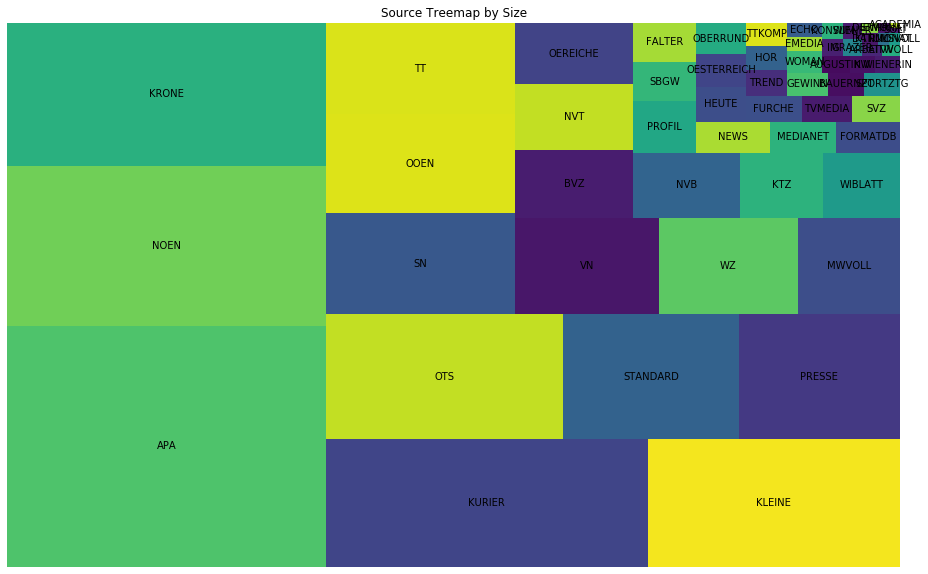

In [102]:
# Group by extension and sum all sizes for each extension
source_sizes = df_files.groupby('source')['size'].sum()

# Sort elements by size
source_sizes = source_sizes.sort_values(ascending=False)

plt.figure(figsize=(16,10))
squarify.plot(sizes=source_sizes.values, 
              label=source_sizes.index.values)

plt.title('Source Treemap by Size')
plt.axis('off');

In [103]:
with plt.style.context('ggplot'):
    # Filter the data set to only folders
    df_folders = df_files[df_files['folder']]
    # Set the name to be the index (so we can use it as a label later)
    df_folders.set_index('name', inplace=True)
    # Sort the folders by size
    df_folders = df_folders.sort_values(by='size', ascending=False)
    
    # Show the size of the largest 50 folders as a bar plot
    df_folders['size'][:50].plot(kind='bar', figsize=(16,8), color='C0', title='Folder Sizes');

TypeError: no numeric data to plot

In [42]:
# Sort the index
df_sorted = df_files.sort_values(by='id')

G = nx.Graph()
for i, row in df_sorted.iterrows():
    if row.parent:
        G.add_edge(row.id, row.parent)
    
# Print some additional information
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 176745
Number of edges: 176744
Average degree:   2.0000


In [44]:
pos_dot = graphviz_layout(G, prog='dot')

fig = plt.figure(figsize=(16, 8))
nodes = nx.draw_networkx_nodes(G, pos_dot, node_size=2, node_color='C0')
edges = nx.draw_networkx_edges(G, pos_dot, edge_color='C0', width=0.5)
plt.axis('off');

FileNotFoundError: [Errno 2] "dot" not found in path.

In [ ]:
pos_twopi = graphviz_layout(G, prog='twopi', root=1)

fig = plt.figure(figsize=(14, 14))
nodes = nx.draw_networkx_nodes(G, pos_twopi, node_size=2, node_color='C0')
edges = nx.draw_networkx_edges(G, pos_twopi, edge_color='C0', width=0.5)
plt.axis('off')
plt.axis('equal');